In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt


In [12]:
C = Conformation()

In [13]:
C.load_struct('Conformations/L1000_beta0.1_1_10(10000)/struct_conf_0.dat')

In [14]:
nghbr = tabulate_neighbors(C.struct)

In [15]:
Cl, B, BS = clusters_and_bridges(nghbr)

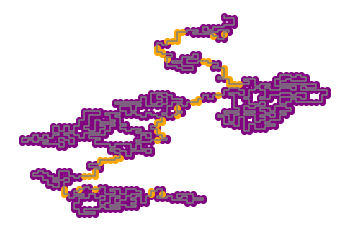

In [16]:
draw_conformation(C.struct, bridges=BS)

In [2]:
def clusters_and_bridges_from_list(conformations):
    k = 0
    clusters = []
    bridges = []
    for conf in conformations:
        k += 1
        if k % 1000 == 0:
            print(k)
        neighbors = tabulate_neighbors(conf.struct)
        c, b, b_s = clusters_and_bridges(neighbors)
        clusters.append(c)
        bridges.append(b)
        
    return clusters, bridges

In [3]:
def get_U_mean(conformations):
    U500 = np.array([c.U for c in conformations])
    U500_mean = U500.mean(axis=0)
    U500_mse = np.sqrt(((U500 - U500_mean) ** 2).mean(axis=0))
    return U500_mean, U500_mse

In [4]:
def prepare_data(dir_name):
    """ loads conformations and calculates binder's cumulant 
    
    Parameters
    ----------
    dir_name: string
        name of directory
    
    Returns
    -------
    conformations: list
        list of conformation data
        
    clusters: list
        list of sizes of conformations 
        
    bridges: list
        list of sizes of bridges
        
    U, U_err: list(float)
        value and error meand binder cumulant
    """
    conformations = load_Conformations_lite_from_dir(dir_name, load_data=True)
    clusters, bridges = clusters_and_bridges_from_list(conformations)
    U500, U500_err = get_U_mean(conformations)
    return conformations, clusters, bridges, U500, U500_err

In [30]:
data_250 = prepare_data('Conformations/L250_beta0.1_1_10(10000)')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [31]:
data_500 = prepare_data('Conformations/L500_beta0.1_1_10(10000)')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [32]:
data_1000 = prepare_data('Conformations/L1000_beta0.1_1_10(10000)')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [5]:
def chose_conformations(data, size=0.8):
    L = data[0][0].L
    confs = []
    for i in range(len(data[0])):
        if len(data[1][i]) >= 0:
            max_c = data[1][i].max()
            s = max_c / L
            if s >= size:
                confs.append(data[0][i])
    
    U, U_err = get_U_mean(confs)
    return U, U_err, len(confs)

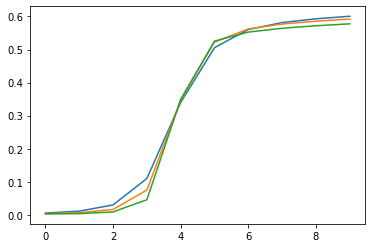

In [35]:
plt.plot(data_250[3])
plt.plot(data_500[3])
plt.plot(data_1000[3])

## Closeup

In [21]:
data_250 = prepare_data('Conformations/L250_beta0.4_0.6_10')
data_500 = prepare_data('Conformations/L500_beta0.4_0.6_10')
data_1000 = prepare_data('Conformations/L1000_beta0.4_0.6_10')
data_2000 = prepare_data('Conformations/L2000_beta0.4_0.6_10')


In [22]:

all_data = [data_250, data_500, data_1000, data_2000]

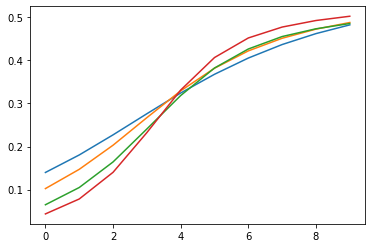

In [23]:
plt.plot(data_250[3])
plt.plot(data_500[3])
plt.plot(data_1000[3])
plt.plot(data_2000[3])

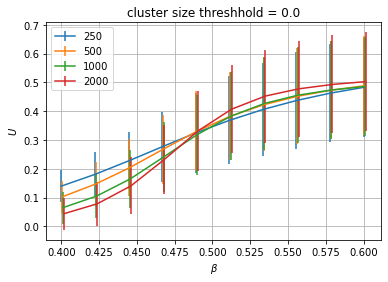

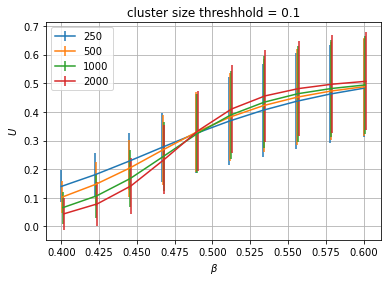

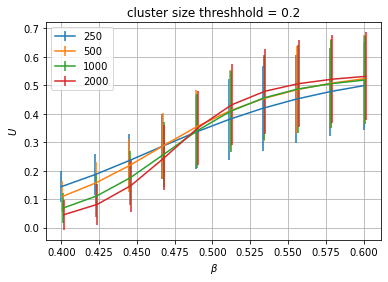

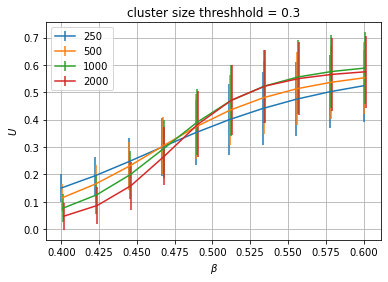

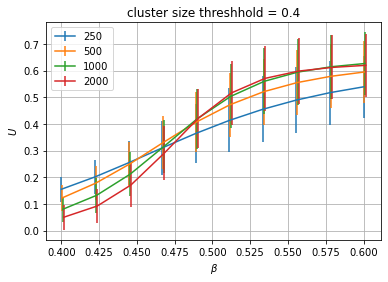

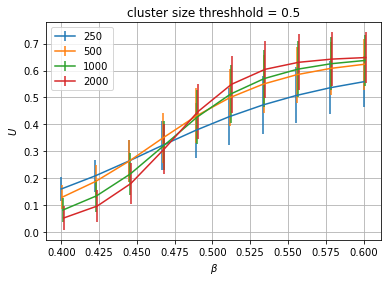

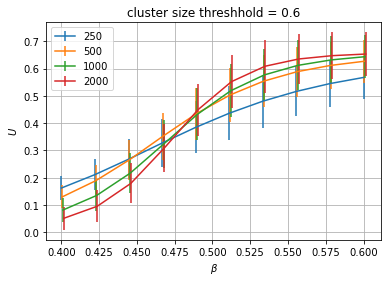

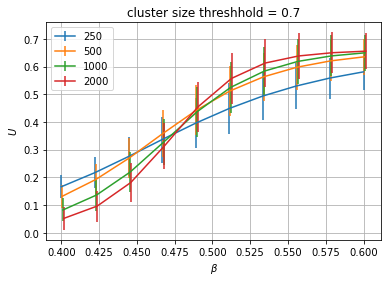

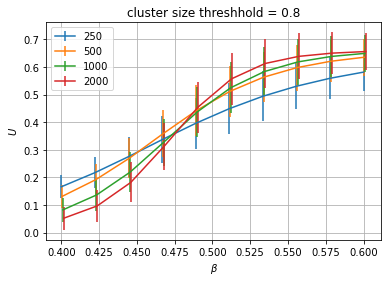

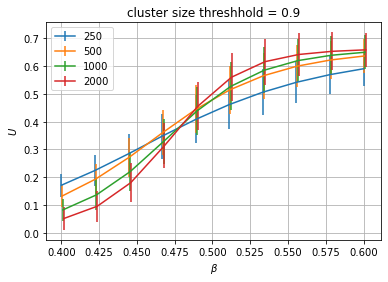

In [14]:
beta = np.linspace(0.4, 0.6, 10)
for s in np.linspace(0., 0.9, 10):
    all_U = [chose_conformations(x, s) for x in all_data]
    plt.title(f'cluster size threshhold = {round(s, 2)}')
    plt.ylabel(r'$U$')
    plt.xlabel(r'$\beta$')
    plt.errorbar(beta, all_U[0][0], yerr=all_U[0][1], label='250')
    plt.errorbar(beta+0.0005, all_U[1][0], yerr=all_U[0][1], label='500')
    plt.errorbar(beta+0.0010, all_U[2][0], yerr=all_U[0][1], label='1000')
    plt.errorbar(beta+0.0015, all_U[3][0], yerr=all_U[0][1], label='2000')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


In [16]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

In [18]:
@interact
def draw_cumulant_close(s = (0., 1., 0.01)):
    all_U = [chose_conformations(x, s) for x in all_data]
    plt.title(f'cluster size threshhold = {round(s, 2)}')
    plt.ylabel(r'$U$')
    plt.xlabel(r'$\beta$')
    plt.errorbar(beta, all_U[0][0], yerr=all_U[0][1], label='250')
    plt.errorbar(beta+0.0005, all_U[1][0], yerr=all_U[0][1], label='500')
    plt.errorbar(beta+0.0010, all_U[2][0], yerr=all_U[0][1], label='1000')
    plt.errorbar(beta+0.0015, all_U[3][0], yerr=all_U[0][1], label='2000')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='s', max=1.0, step=0.01), Output()), _dom_classes=('w…

# Find intersection point

In [6]:
def interception(x1, x2, y11, y12, y21, y22):
    """
    находит пересечение двух отрезков с координатами концов с одинаковыми координатами по x, но разными по y
    
    Parametrs:
    x1, x2: float
        координаты концов по x, x1 < x2
    
    y11, y12: float
        координаты концов первого отрезка по y
        
    y21, y22: float
        координаты концов второго отрезка по y
        
    return:
    x, y: int
        координаты пересечения, если оно существует на промежутке [x1, x2]
        иначе None
    """
    
    if x1 > x2:
        x1, x2 = x2, x1
        y11, y12 = y12, y11
        y21, y22 = y22, y21
    
    try:
        x = x1 + (y21 - y11)*(x2 - x1)/(y12 - y11 - y22 + y21)
    except(ZeroDivisionError):
        return None
    if x < x1 or x > x2:
        return None
    
    y = (y12 - y11)/(x2 - x1) * (x - x1) + y11
    
    return x, y

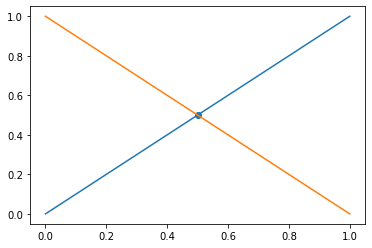

In [66]:
# test 1
x = [0, 1]
y1 = [0, 1]
y2 = [1, 0]
plt.plot(x, y1)
plt.plot(x, y2)
xi, yi = interception(*x, *y1, *y2)
plt.scatter(xi, yi)

None


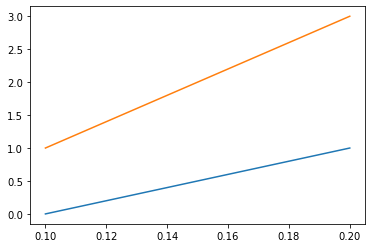

In [69]:
# test 2
x = [0.1, 0.2]
y1 = [0, 1]
y2 = [1, 3]
plt.plot(x, y1)
plt.plot(x, y2)
print(interception(*x, *y1, *y2))

In [7]:
def U_intersection_index(beta, U1, U2):
    """ находит индекс отрезка, на котором пересекаются кумулянты """
    n = len(beta)
    for i in range(n-1):
        p = interception(beta[i], beta[i+1], U1[i], U1[i+1], U2[i], U2[i+1])
        if p is not None:
            return i
    
    return None

In [103]:
b_max = 0.6
b_min = 0.4
betas = np.linspace(b_min+(b_max-b_min)/10, b_max, 10)

I = U_intersection_index(betas, data_250[3], data_500[3])

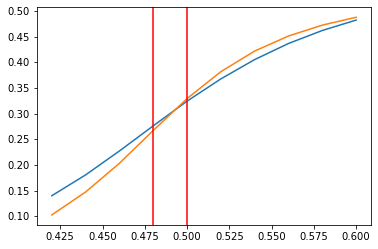

In [104]:
# test
plt.plot(betas, data_250[3])
plt.plot(betas, data_500[3])
plt.axvline(betas[I], color='red')
plt.axvline(betas[I+1], color='red')

In [8]:
def U_inter_point(betas, U1, U2):
    I = U_intersection_index(betas, U1, U2)
    if I is None:
        raise Exception('No intersection point')
        
    p = interception(betas[I], betas[I+1], U1[I], U1[I+1], U2[I], U2[I+1])
    return p

In [9]:
def generate_distribution(betas, U1, U1_err, U2, U2_err, seed, N):
    I = U_intersection_index(betas, U1, U2)
    if I is None:
        raise Exception('No intersection point')
        
    rng = np.random.default_rng(seed)
    u11 = rng.normal(U1[I], U1_err[I], size=N)
    u12 = rng.normal(U1[I+1], U1_err[I+1], size=N)
    u21 = rng.normal(U2[I], U2_err[I], size=N)
    u22 = rng.normal(U2[I+1], U2_err[I+1], size=N)
    
    x = []
    y = []
    
    for i in range(N):
        p = interception(betas[I], betas[I+1], u11[i], u12[i], u21[i], u22[i])
        if p is not None:
            x.append(p[0])
            y.append(p[1])
            
    return np.array(x), np.array(y)    

In [167]:
x, y = generate_distribution(betas, data_250[3], data_250[4], data_500[3], data_500[4], 1111, 1000000)

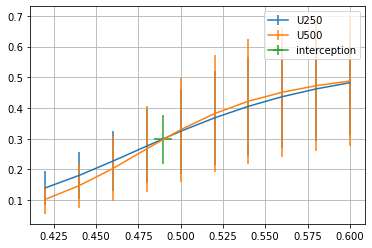

In [150]:
plt.errorbar(betas, data_250[3], yerr=data_250[4], label='U250')
plt.errorbar(betas, data_500[3], yerr=data_500[4], label='U500')
x_err = np.sqrt(((x.mean() - x)**2).mean())
y_err = np.sqrt(((y.mean() - y)**2).mean())
plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='interception')
plt.legend(loc='best')
plt.grid(True)

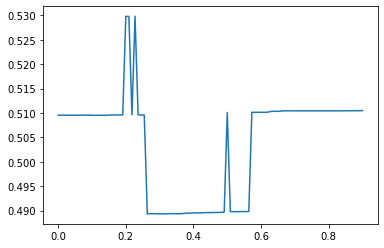

In [164]:
x_s = []
sizes = np.linspace(0., 0.9, 100)
for s in sizes:
    U500, U500_err, _ = chose_conformations(data_500, size=s)
    U1000, U1000_err, _ = chose_conformations(data_1000, size=s)
    x, y = generate_distribution(betas, U500, U500_err, U1000, U1000_err, 1111, 10000)
    x_s.append(x.mean())
    
plt.plot(sizes, x_s)

<ErrorbarContainer object of 3 artists>

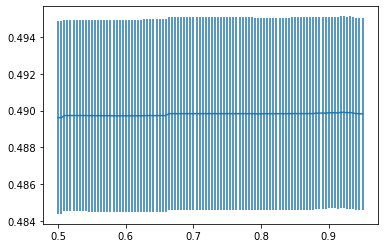

In [171]:
x_s = []
x_s_err = []
sizes = np.linspace(0.5, 0.95, 100)
for s in sizes:
    U2000, U2000_err, _ = chose_conformations(data_2000, size=s)
    U1000, U1000_err, _ = chose_conformations(data_1000, size=s)
    x, y = generate_distribution(betas, U2000, U2000_err, U1000, U1000_err, 1111, 10000)
    x_s.append(x.mean())
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    x_s_err.append(x_err)
plt.errorbar(sizes, x_s, yerr=x_s_err)

# 10 000 points

In [12]:
data_250 = prepare_data('Conformations/L250_beta0.4_0.6_10(10000)')
print(250)
data_500 = prepare_data('Conformations/L500_beta0.4_0.6_10(10000)')
print(500)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
250
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
500


In [13]:
betas = data_250[0][0].betas

<ErrorbarContainer object of 3 artists>

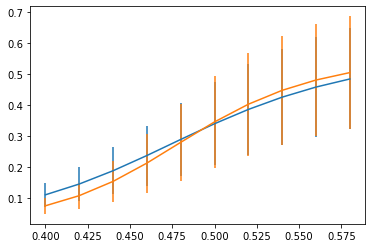

In [14]:
plt.errorbar(betas, data_250[-2], yerr=data_250[-1])
plt.errorbar(betas, data_500[-2], yerr=data_500[-1])

In [14]:
x, y = generate_distribution(betas, data_250[3], data_250[4], data_500[3], data_500[4], 1111, 10000)

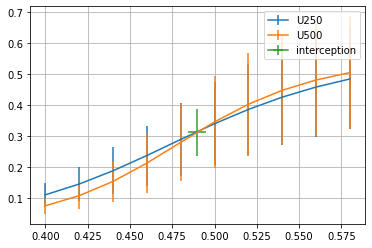

In [15]:
plt.errorbar(betas, data_250[3], yerr=data_250[4], label='U250')
plt.errorbar(betas, data_500[3], yerr=data_500[4], label='U500')
x_err = np.sqrt(((x.mean() - x)**2).mean())
y_err = np.sqrt(((y.mean() - y)**2).mean())
plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='interception')
plt.legend(loc='best')
plt.grid(True)

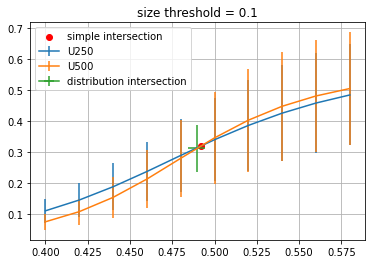

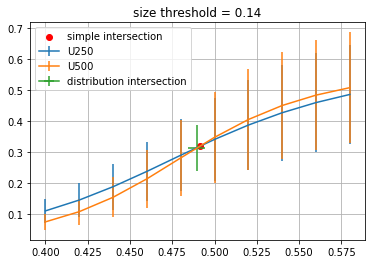

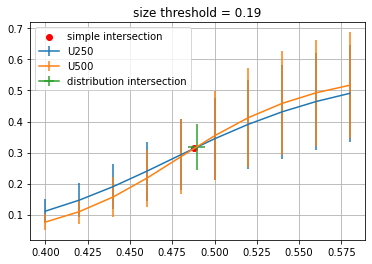

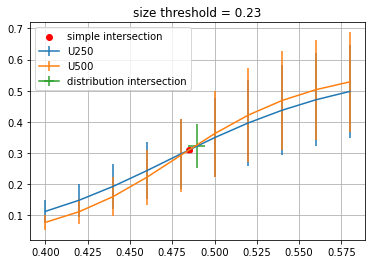

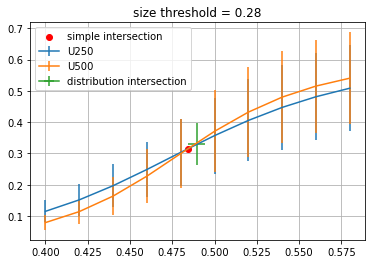

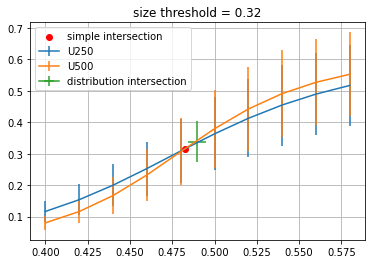

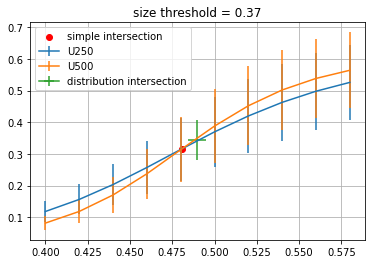

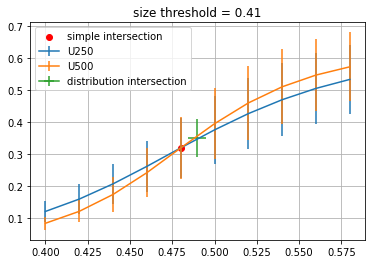

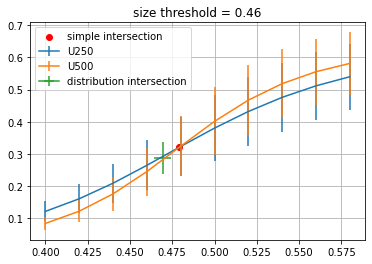

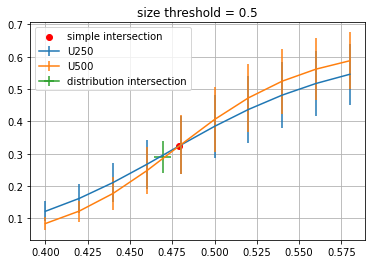

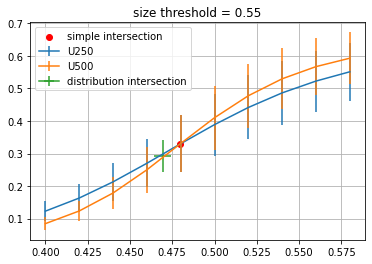

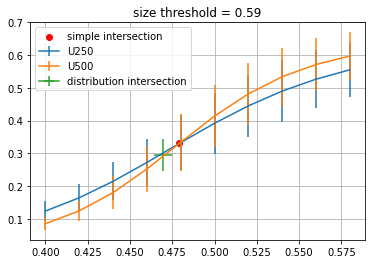

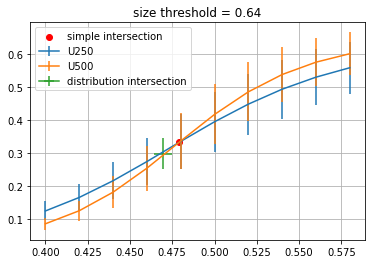

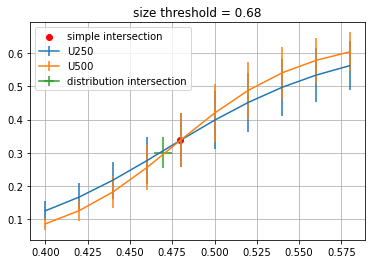

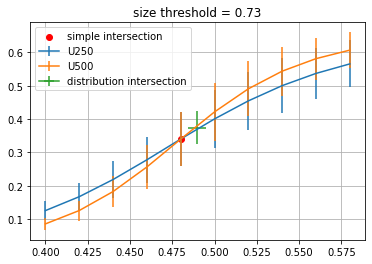

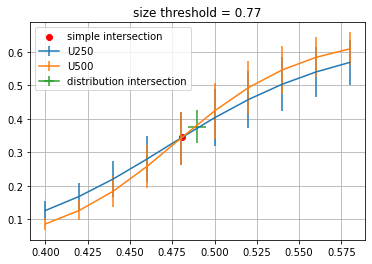

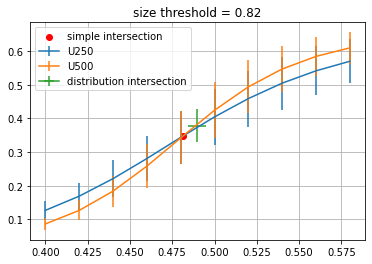

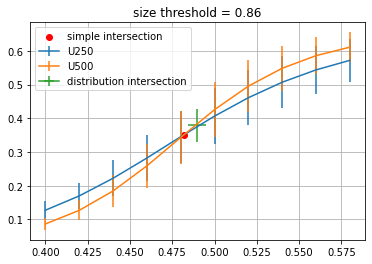

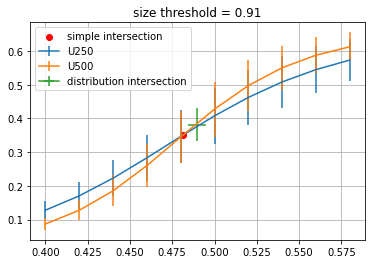

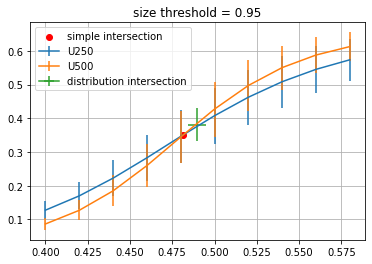

In [24]:
x_s = []
x_s_err = []
sizes = np.linspace(0.1, 0.95, 20)

x_s_simple = []

for s in sizes:
    U1, U1_err, _ = chose_conformations(data_250, size=s)
    U2, U2_err, _ = chose_conformations(data_500, size=s)
    x, y = generate_distribution(betas, U1, U1_err, U2, U2_err, 1111, 100000)
    x_s.append(x.mean())
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    x_s_err.append(x_err)
    
    plt.title(f'size threshold = {round(s, 2)}')
    
    simple_p = U_inter_point(betas, U1, U2)
    x_s_simple.append(simple_p[0])
    plt.scatter(*simple_p, label='simple intersection', c='red')
    
    plt.errorbar(betas, U1, yerr=U1_err, label='U250')
    plt.errorbar(betas, U2, yerr=U2_err, label='U500')
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    y_err = np.sqrt(((y.mean() - y)**2).mean())
    plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='distribution intersection')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    


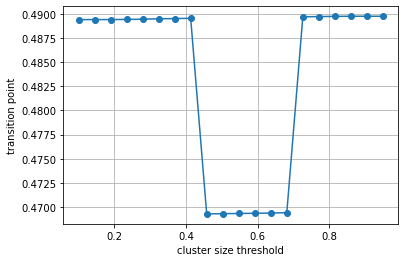

In [25]:
plt.ylabel('transition point')
plt.xlabel('cluster size threshold')
plt.errorbar(sizes, x_s, fmt='-o')
plt.grid(True)
plt.show()

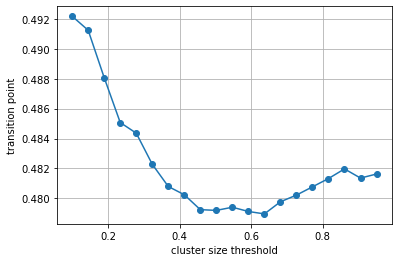

In [26]:
plt.ylabel('transition point')
plt.xlabel('cluster size threshold')
plt.errorbar(sizes, x_s_simple, fmt='-o')
plt.grid(True)
plt.show()

# Least squares method

In [15]:
def fit_line(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

In [16]:
def generate_distribution_2(betas, U1, U1_err, U2, U2_err, seed, N, L, R):
    """
    Generates distribution of intersection points for two cumulants
    
    Parametes
    ---------
    betaas: np.array (:) <float>
        beta values in witch confromations are measured
    
    U1: np.array (:) <float>
        first cumulant values
        
    U1_err: np.array (:) <float>
        first cumulant errors
        
    U2: np.array (:) <float>
        second cumulant values
        
    U2_err: np.array (:) <float>
        second cumulant errors
        
    seed: int
        rng seed
    
    N: int
        number of samples to generate
    
    L: int
        number of points to take to the left of intersection inteval
    
    R: int
        number of points to take to the right of intersection interval
    """
    I = U_intersection_index(betas, U1, U2)
    if I is None:
        raise Exception('No intersection point')
        
    rng = np.random.default_rng(seed)
    
    l = max(0, I-L) # included
    r = min(I+2+R, len(betas)) # not included
    npts = r - l
    print(f'I:{I} l:{l} r:{r} npts:{npts}')
    u1_distr = np.empty((r - l, N), dtype=float)
    u2_distr = np.empty((r - l, N), dtype=float)
    for i in range (npts):
        u1_distr[i, :] = rng.normal(U1[l+i], U1_err[l+i], size=N)
        u2_distr[i, :] = rng.normal(U2[l+i], U2_err[l+i], size=N)
    
    x = []
    y = []
    
    for i in range(N):
        m1, c1 = fit_line(betas[l:r], u1_distr[:, i])
        m2, c2 = fit_line(betas[l:r], u2_distr[:, i])
        
        p = interception(betas[l],
                         betas[r-1],
                         m1*betas[l]+c1,
                         m1*betas[r-1]+c1,
                         m2*betas[l]+c2,
                         m2*betas[r-1]+c2)
        if p is not None:
            x.append(p[0])
            y.append(p[1])
            
    return np.array(x), np.array(y)    

I:4 l:3 r:6 npts:3


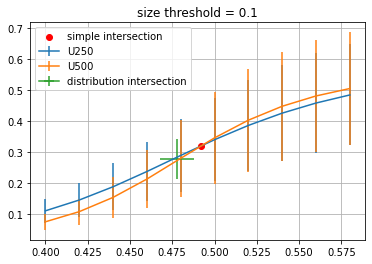

I:4 l:3 r:6 npts:3


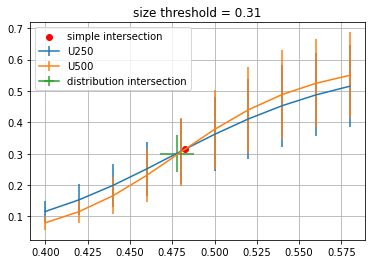

I:3 l:2 r:5 npts:3


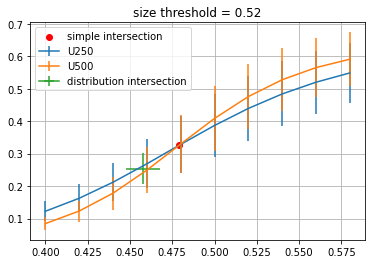

I:4 l:3 r:6 npts:3


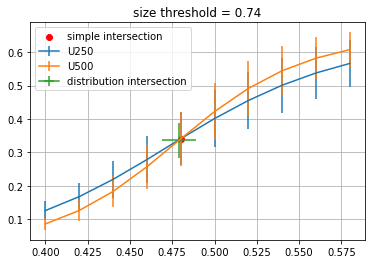

I:4 l:3 r:6 npts:3


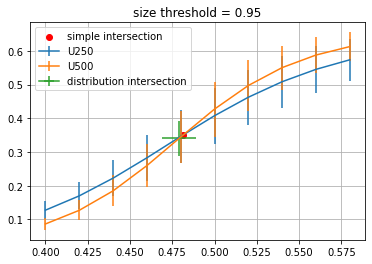

In [17]:
x_s = []
x_s_err = []
sizes = np.linspace(0.1, 0.95, 5)

x_s_simple = []

for s in sizes:
    U1, U1_err, _ = chose_conformations(data_250, size=s)
    U2, U2_err, _ = chose_conformations(data_500, size=s)
    x, y = generate_distribution_2(betas[::-1], U1[::-1], U1_err[::-1], U2[::-1], U2_err[::-1], 1111, 100000, 1, 0)
    x_s.append(x.mean())
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    x_s_err.append(x_err)
    
    plt.title(f'size threshold = {round(s, 2)}')
    
    simple_p = U_inter_point(betas, U1, U2)
    x_s_simple.append(simple_p[0])
    plt.scatter(*simple_p, label='simple intersection', c='red')
    
    plt.errorbar(betas, U1, yerr=U1_err, label='U250')
    plt.errorbar(betas, U2, yerr=U2_err, label='U500')
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    y_err = np.sqrt(((y.mean() - y)**2).mean())
    plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='distribution intersection')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    


I:4 l:4 r:7 npts:3


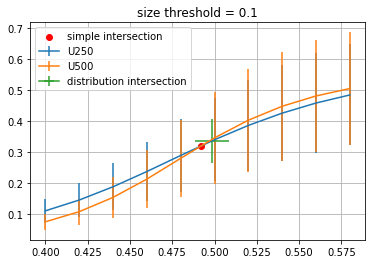

I:4 l:4 r:7 npts:3


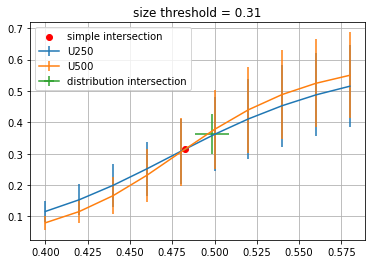

I:3 l:3 r:6 npts:3


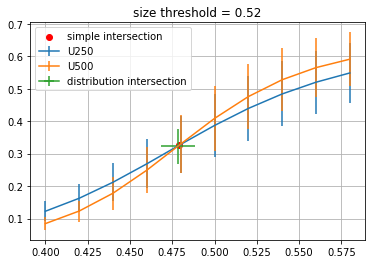

I:4 l:4 r:7 npts:3


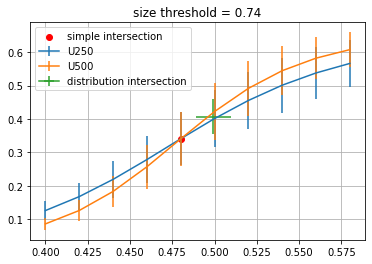

I:4 l:4 r:7 npts:3


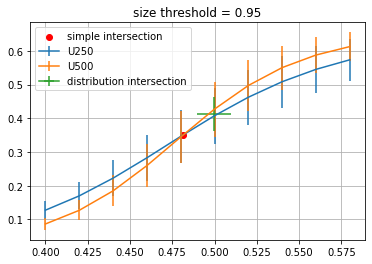

In [18]:
x_s = []
x_s_err = []
sizes = np.linspace(0.1, 0.95, 5)

x_s_simple = []

for s in sizes:
    U1, U1_err, _ = chose_conformations(data_250, size=s)
    U2, U2_err, _ = chose_conformations(data_500, size=s)
    x, y = generate_distribution_2(betas[::-1], U1[::-1], U1_err[::-1], U2[::-1], U2_err[::-1], 1111, 100000, 0, 1)
    x_s.append(x.mean())
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    x_s_err.append(x_err)
    
    plt.title(f'size threshold = {round(s, 2)}')
    
    simple_p = U_inter_point(betas, U1, U2)
    x_s_simple.append(simple_p[0])
    plt.scatter(*simple_p, label='simple intersection', c='red')
    
    plt.errorbar(betas, U1, yerr=U1_err, label='U250')
    plt.errorbar(betas, U2, yerr=U2_err, label='U500')
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    y_err = np.sqrt(((y.mean() - y)**2).mean())
    plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='distribution intersection')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    


I:4 l:3 r:7 npts:4


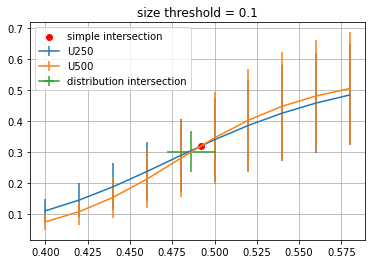

I:4 l:3 r:7 npts:4


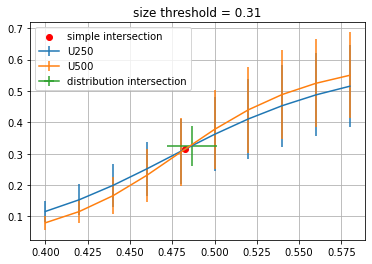

I:3 l:2 r:6 npts:4


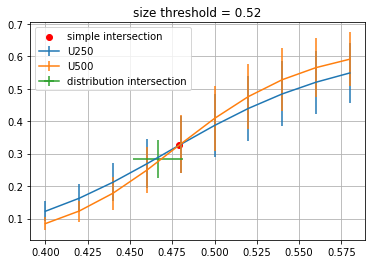

I:4 l:3 r:7 npts:4


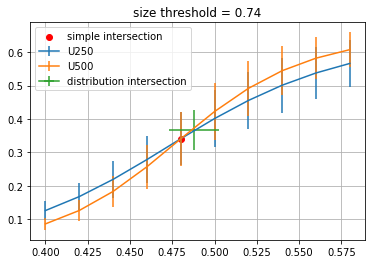

I:4 l:3 r:7 npts:4


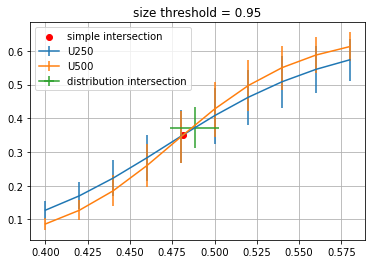

In [19]:
x_s = []
x_s_err = []
sizes = np.linspace(0.1, 0.95, 5)

x_s_simple = []

for s in sizes:
    U1, U1_err, _ = chose_conformations(data_250, size=s)
    U2, U2_err, _ = chose_conformations(data_500, size=s)
    x, y = generate_distribution_2(betas[::-1], U1[::-1], U1_err[::-1], U2[::-1], U2_err[::-1], 1111, 100000, 1, 1)
    x_s.append(x.mean())
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    x_s_err.append(x_err)
    
    plt.title(f'size threshold = {round(s, 2)}')
    
    simple_p = U_inter_point(betas, U1, U2)
    x_s_simple.append(simple_p[0])
    plt.scatter(*simple_p, label='simple intersection', c='red')
    
    plt.errorbar(betas, U1, yerr=U1_err, label='U250')
    plt.errorbar(betas, U2, yerr=U2_err, label='U500')
    x_err = np.sqrt(((x.mean() - x)**2).mean())
    y_err = np.sqrt(((y.mean() - y)**2).mean())
    plt.errorbar(x.mean(), y.mean(), xerr=x_err, yerr=y_err, label='distribution intersection')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
